 1. Import libraries
 2. Import dataframe
 3. Create a histogram of 'order_hour_of_day'
 4. Create a bar chart from the 'loyalty_flag'
 5. Create a sample for use in line chart
 6. Create a line chart to determine whether there's a difference in expenditure depending on hour of the day
 7. Create line chart analyzing age and number of dependants
 8. Create a scatterplot analyzing spending power (income) and customer age 

    1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

     2. Import dataframe

In [2]:
#shortcut the main file to path
path = r'C:\Users\dodge\24-06-2023 Instacart Basket Analysis'

In [3]:
#Import new merged file
Orders_products_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))

You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

In [4]:
#Review the layout
Orders_products_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,Gender,State,Age,date_joined,dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


    3. Create a histogram of 'order_hour_of_day'

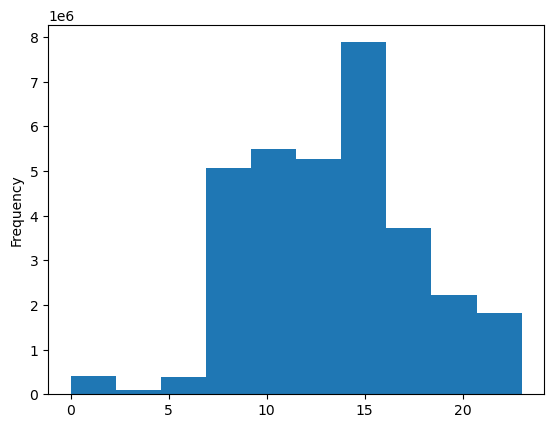

In [5]:
#Create histogram of order hour of day
hist = Orders_products_all['order_hour_of_day'].plot.hist()

In [6]:
#Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hod.png'))

The histogram demonstrates that most orders are placed around 1400, or in the 2pm hour; the hours leading up to that from about 0800 (8am-2pm) are also very busy.  Least orders are definitely placed between 000 (midnight) and around 0700 (7am).  I don't find this graph as visually appealing as the histograms created in other formats; you can't hover over a bar and have it tell you what hour it is and what the figure is.

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

    4. Create a bar chart from the 'loyalty_flag'

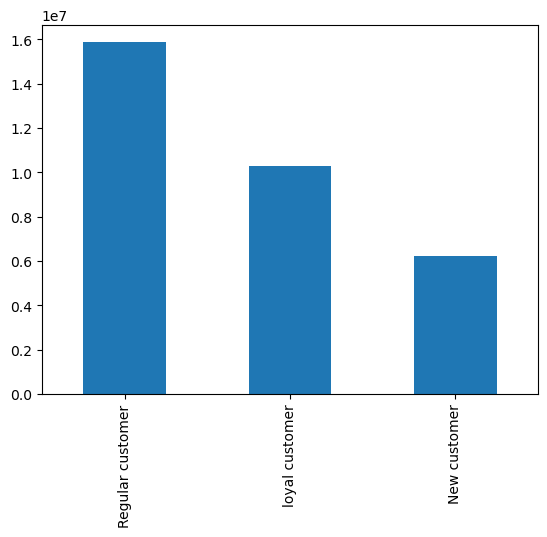

In [7]:
bar = Orders_products_all['loyalty_flag'].value_counts().plot.bar()

In [8]:
#Save visualization to file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

    5. Create a sample for use in line charts

In [4]:
#Set the seed & create a list holding true/false values
np.random.seed(4)
dev = np.random.rand(len(Orders_products_all)) <= 0.7

In [5]:
# Store 70% of the sample in the dataframe big
big = Orders_products_all[dev]

In [6]:
#Store 30% of the sample in the dataframe small
small = Orders_products_all[~dev]

In [7]:
#Verify the lengths
len(Orders_products_all)

32404859

In [8]:
#Verify big + small
len(big) + len(small)

32404859

    6. Create a line chart to determine whether there's a difference in expenditure depending on hour of the day

In [9]:
#Create a dataframe with only the price and hour of the day columns
df_price_hod = small[['order_hour_of_day', 'prices']]

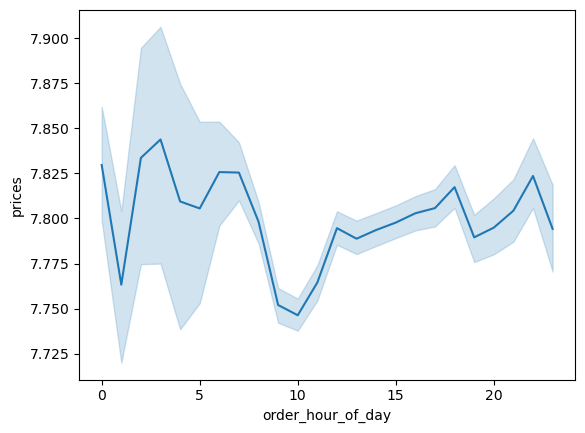

In [10]:
#Create a linechart from the small sample
line = sns.lineplot(data = df_price_hod, x = 'order_hour_of_day',y = 'prices')

This is very interesting with a larger margin of error in the earlier hours that have fewer orders being placed as well; there is a dramatic drop around the 10:00 hour, but an overall variation between ~7.775 and 7.850 is pretty tight.

In [11]:
#Save visualization to file
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_hod.png'))

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

    7. Create line chart analyzing age and number of dependants

In [12]:
#Create a dataframe with only the columns being used for this line chart
df_age_dep = small[['Age', 'dependants']]

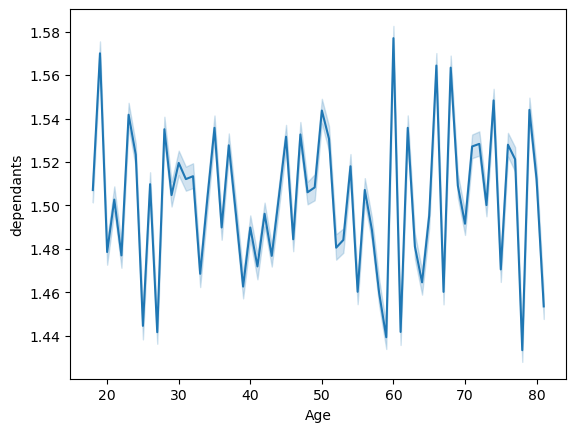

In [13]:
#Create a linechart from the small sample
line = sns.lineplot(data = df_age_dep, x = 'Age', y = 'dependants')

To me, this seems to imply there is no connection between age and number of dependants.  There is a small margin of error.

In [14]:
#Save visualization to file
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dep.png'))

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

    8. Create a scatterplot analyzing spending power (income) and customer age

<Axes: xlabel='Age', ylabel='income'>

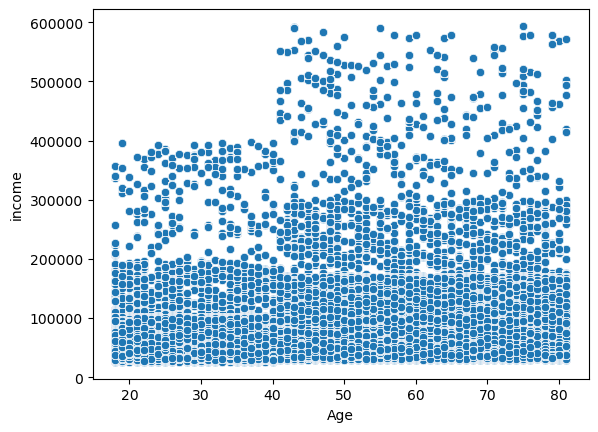

In [16]:
#Create a scatterplot between age and income
sns.scatterplot(x = 'Age', y = 'income', data = Orders_products_all)

This is fascinating.  To me, this says the majority of Instacart's customers have an income less than 200,000 across all ages.  Income between 200,000-300,000 is seen more in the age group over 40, but defintiely some between the ages of 20-40.  Income over 400,000 is only seen in the 40+ age population.

In [20]:
#Save visualization to file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))

<Figure size 640x480 with 0 Axes>

In [21]:
#Export regular file
Orders_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))